Лабораторная работа №3. Реализация сверточной нейронной сети

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow и tf.keras
# !python3 -m pip install keras
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
from keras.layers import Dense, Conv2D, Flatten


# Вспомогательные библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pdb
from six.moves import cPickle as pickle
import os
from scipy import ndimage

Using TensorFlow backend.


In [2]:
def extract_dataset():
    with open('../data/notMNIST_sanit.pickle', 'rb') as f:
        data = pickle.load(f)

    # reshape dataset because of error:
    # ValueError: Error when checking input: expected conv2d_input to have 4 dimensions,
    # but got array with shape (200000, 28, 28)
    for key, dataset in data.items():
        data[key] = dataset.reshape(*dataset.shape, 1)
    return data

In [3]:
dataset = extract_dataset()
train_images = dataset['train_dataset']
train_labels = dataset['train_labels']
valid_images = dataset['valid_dataset']
valid_labels = dataset['valid_labels']
test_images = dataset['test_dataset']
test_labels = dataset['test_labels']

Задание 1.
Реализуйте нейронную сеть с двумя сверточными слоями, и одним полносвязным с нейронами с кусочно-линейной функцией активации. Какова точность построенное модели?


In [4]:
# kernel_size=3 — размер ядра 3х3.
# Функция активации 'relu' ( Rectified Linear Activation ),
# 64 это число ядер свертки( сколько признаком будем искать).
# Flatten() – слой, преобразующий 2D-данные в 1D-данные.
conv2d_model = keras.Sequential([
    keras.layers.Conv2D(8, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    keras.layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

conv2d_model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

conv2d_model.summary()

conv2d_history = conv2d_model.fit(train_images,
                                      train_labels,
                                      epochs=10,
                                      validation_data=(valid_images, valid_labels))

test_loss, test_acc = conv2d_model.evaluate(test_images,  test_labels, verbose=2)

print('\nТочность на проверочных данных:', test_acc)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               921700    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 923,958
Trainable params: 923,958
Non-trainable params: 0
_________________________________________________________________
Train on 200000 samples, validate on 16911 samples
Epoch 1/10
200000/200000 [==============================] - 79s 3

Задание 2.
Замените один из сверточных слоев на слой,
реализующий операцию пулинга (Pooling) с функцией максимума или среднего.
Как это повлияло на точность классификатора?

Helpful links:
https://neurohive.io/ru/osnovy-data-science/glubokaya-svertochnaja-nejronnaja-set/
https://medium.com/@congyuzhou/pooling-%D1%81%D0%BB%D0%BE%D0%B9-dbe00ef48eab


In [5]:
maxpool_model = keras.Sequential([
    keras.layers.Conv2D(8, kernel_size=3, activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

maxpool_model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

maxpool_model.summary()

maxpool_history = maxpool_model.fit(train_images,
                                      train_labels,
                                      epochs=10,
                                      validation_data=(valid_images, valid_labels))

test_loss, test_acc = maxpool_model.evaluate(test_images,  test_labels, verbose=2)

print('\nТочность на проверочных данных:', test_acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               135300    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 136,390
Trainable params: 136,390
Non-trainable params: 0
_________________________________________________________________
Train on 200000 samples, validate on 16911 samples
Epoch 1/10
200000/200000 [==============================] - 36s

Задание 3.
Реализуйте классическую архитектуру сверточных сетей LeNet-5 (http://yann.lecun.com/exdb/lenet/).


padding: https://medium.com/@congyuzhou/padding-32266fa95816
https://medium.com/@congyuzhou/lenet-5-%D1%81%D0%B2%D0%BE%D0%B8%D0%BC%D0%B8-%D1%80%D1%83%D0%BA%D0%B0%D0%BC%D0%B8-b60ae3727cd3


In [6]:
# stride - шаг
lenet5_model = keras.Sequential([
    keras.layers.Conv2D(filters=6, kernel_size=[5,5], padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=[2,2], strides=2),
    keras.layers.Conv2D(filters=16, kernel_size=[5,5], padding='valid', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=[2,2], strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=120, activation='relu'),
    keras.layers.Dense(units=84, activation='relu'),
    keras.layers.Dense(units=10, activation = 'softmax')
])

lenet5_model.compile(optimizer='sgd',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

lenet5_history = lenet5_model.fit(train_images,
                                    train_labels,
                                    epochs=10,
                                    validation_data=(valid_images, valid_labels))
                                    
lenet5_model.summary()


test_loss, test_acc = lenet5_model.evaluate(test_images,  test_labels, verbose=2)

print('\nТочность на проверочных данных:', test_acc)

Train on 200000 samples, validate on 16911 samples
Epoch 1/10
200000/200000 [==============================] - 67s 336us/sample - loss: 0.6139 - accuracy: 0.8175 - val_loss: 0.4642 - val_accuracy: 0.8650
Epoch 2/10
200000/200000 [==============================] - 67s 336us/sample - loss: 0.3927 - accuracy: 0.8833 - val_loss: 0.4094 - val_accuracy: 0.8798
Epoch 3/10
200000/200000 [==============================] - 68s 339us/sample - loss: 0.3551 - accuracy: 0.8929 - val_loss: 0.3850 - val_accuracy: 0.8856
Epoch 4/10
200000/200000 [==============================] - 67s 337us/sample - loss: 0.3323 - accuracy: 0.8997 - val_loss: 0.3659 - val_accuracy: 0.8921
Epoch 5/10
200000/200000 [==============================] - 68s 338us/sample - loss: 0.3164 - accuracy: 0.9040 - val_loss: 0.3538 - val_accuracy: 0.8955
Epoch 6/10
200000/200000 [==============================] - 68s 338us/sample - loss: 0.3040 - accuracy: 0.9075 - val_loss: 0.3497 - val_accuracy: 0.8966
Epoch 7/10
200000/200000 [=====

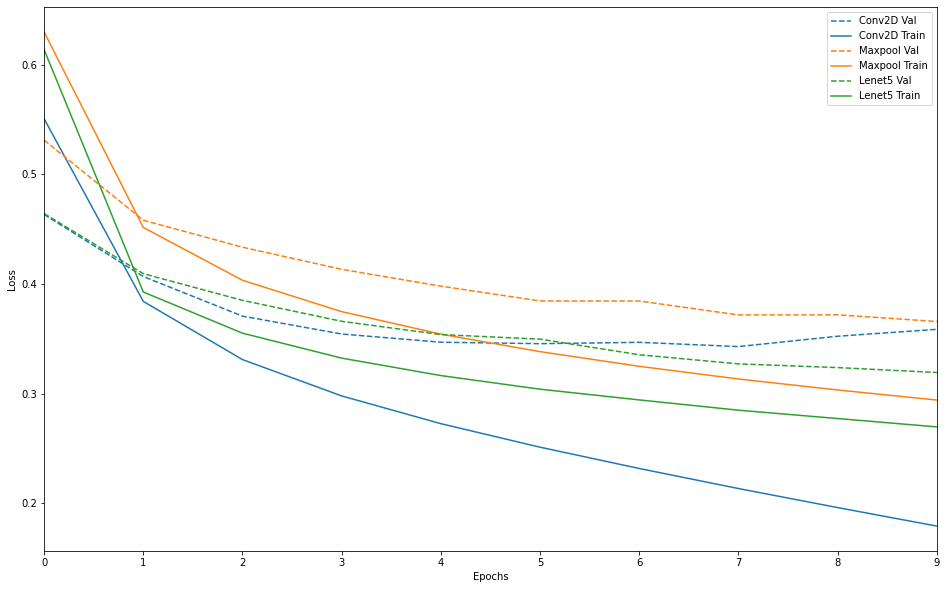

In [7]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_' + key],
                        '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])
    
    plt.show()

plot_history(
    [
        ('conv2d', conv2d_history),
        ('maxpool', maxpool_history),
        ('lenet5', lenet5_history)
    ],
    key='loss')